In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import math

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,y
0,10.32,30.41,10.52,21.10,67.36,30.07,41.05,15.82,14.22,38.28,84.75,82.50,0.0
1,6.58,27.29,7.28,28.64,57.72,63.01,71.34,22.18,23.25,41.44,76.46,80.81,0.0
2,10.50,35.00,8.56,31.02,61.85,49.37,65.00,36.38,29.74,51.09,80.34,83.52,0.0
3,6.20,29.43,5.39,27.29,50.45,44.05,49.24,25.09,25.30,28.02,64.59,60.71,0.0
4,15.13,34.93,13.54,35.23,61.66,63.32,70.58,28.75,28.70,41.00,93.23,88.44,0.0


In [9]:
train.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
y      0
dtype: int64

array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>],
       [<Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>,
        <Axes: title={'center': 'V6'}>],
       [<Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>],
       [<Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>,
        <Axes: title={'center': 'V12'}>]], dtype=object)

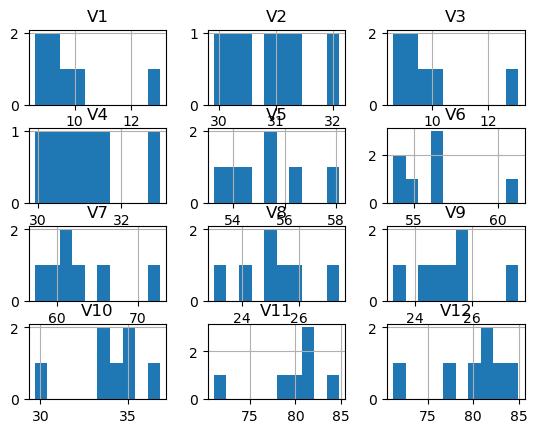

In [10]:
train.groupby('y').mean().hist()

In [11]:
y_train = train['y'].astype('int')
train.drop('y', axis=1, inplace=True)

y_test = test['y'].astype('int')
test.drop('y', axis=1, inplace=True)

In [12]:
train.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
0,10.32,30.41,10.52,21.10,67.36,30.07,41.05,15.82,14.22,38.28,84.75,82.50
1,6.58,27.29,7.28,28.64,57.72,63.01,71.34,22.18,23.25,41.44,76.46,80.81
2,10.50,35.00,8.56,31.02,61.85,49.37,65.00,36.38,29.74,51.09,80.34,83.52


In [14]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
28704    6
28705    6
28706    6
28707    6
28708    6
Name: y, Length: 28709, dtype: int32

In [16]:
print("Size of train", len(train))
print("Size of test", len(test))

Size of train 28709
Size of test 7178


In [28]:
y_train.value_counts().reset_index().sort_values(by='y')

,y,count
4,0,3995
6,1,436
3,2,4097
0,3,7215
1,4,4965
2,5,4830
5,6,3171


In [29]:
y_test.value_counts().reset_index().sort_values(by='y')

,y,count
4,0,958
6,1,111
3,2,1024
0,3,1774
2,4,1233
1,5,1247
5,6,831


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
model = GradientBoostingClassifier()

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [44]:
param_grid = {
    'n_estimators': [10, 50, 100, 500, 1000, 5000],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_depth': [3, 7, 9],
}

In [45]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [ ]:
grid_result = grid_search.fit(train, y_train)